In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pickle
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier

In [2]:
from spacy import load

In [3]:
nlp = load("en_core_web_sm")

# Import the dataset

In [4]:
spam=pd.read_csv("spam.csv",encoding='latin-1')
print(spam.shape)

(5572, 5)


In [5]:
spam.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Data Cleaning

In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [9]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam.sample(5)

,target,text
3403,ham,Then Ì_ ask dad to pick Ì_ up lar... ÌÏ wan 2 ...
3926,ham,Lol ... I really need to remember to eat when ...
2618,ham,Hey pple...$700 or $900 for 5 nights...Excelle...
3924,ham,As if i wasn't having enough trouble sleeping.
1864,ham,You call him now ok i said call him


In [11]:
encoder=LabelEncoder()
spam['target']=encoder.fit_transform(spam['target'])

In [12]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
spam.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
spam.duplicated().sum()

403

In [15]:
spam.drop_duplicates(keep='first',inplace=True)

In [16]:
spam.duplicated().sum()

0

# Exploratory Data Analysis

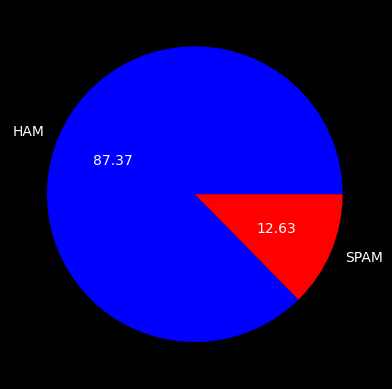

In [17]:
plt.pie(spam['target'].value_counts(),labels=['HAM','SPAM'],autopct='%0.2f',colors=['blue','red'])
plt.show()

In [18]:
#data is imbalanced
spam['num_alphabets']=spam['text'].apply(len)
spam.head()

,target,text,num_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
#num of words
spam['num_words'] = spam['text'].apply(lambda x: len(nlp(x)))


In [20]:
spam.head()

,target,text,num_alphabets,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
spam['num_sentences'] = spam['text'].apply(lambda x: len(list(nlp(x).sents)))



In [22]:
spam.head()

,target,text,num_alphabets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
spam[['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.118398
std,58.236293,13.175170,1.464065
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,23.000000


In [24]:
# ham
spam[spam['target'] == 0][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.975199
std,56.358207,13.224373,1.403778
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,23.000000


In [25]:
# spam
spam[spam['target'] == 1][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.108729
std,30.137753,7.361204,1.489884
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,8.000000


<Axes: xlabel='num_alphabets', ylabel='Count'>

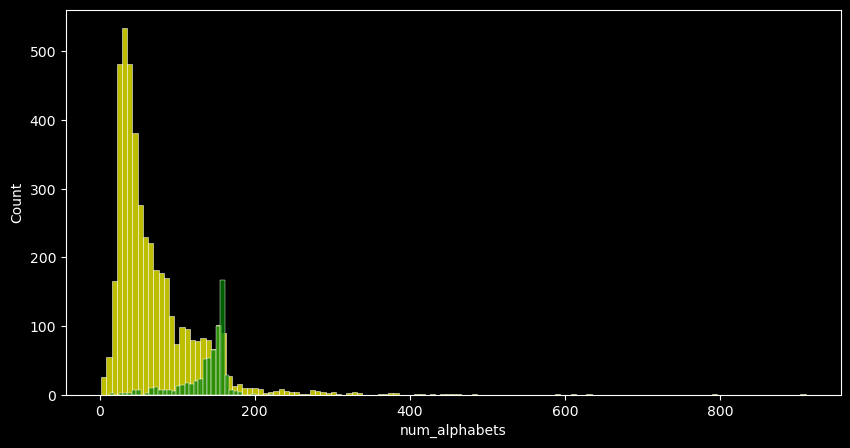

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(spam[spam['target'] == 0]['num_alphabets'],color='yellow')
sns.histplot(spam[spam['target'] == 1]['num_alphabets'],color='green')


<Axes: xlabel='num_words', ylabel='Count'>

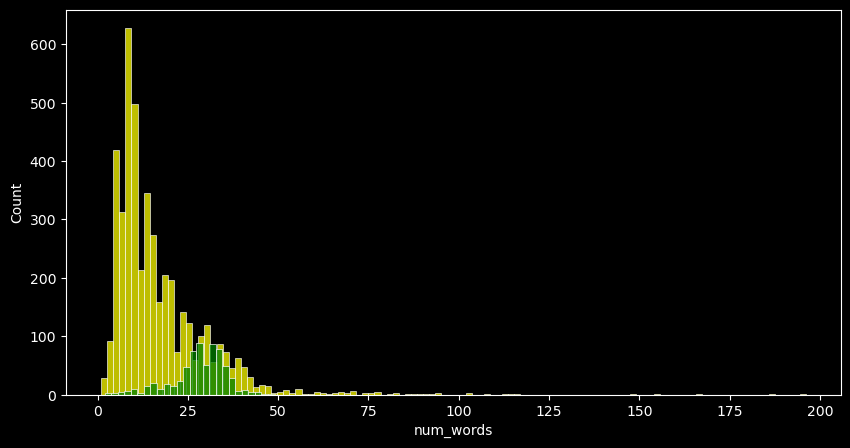

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(spam[spam['target'] == 0]['num_words'],color='yellow')
sns.histplot(spam[spam['target'] == 1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

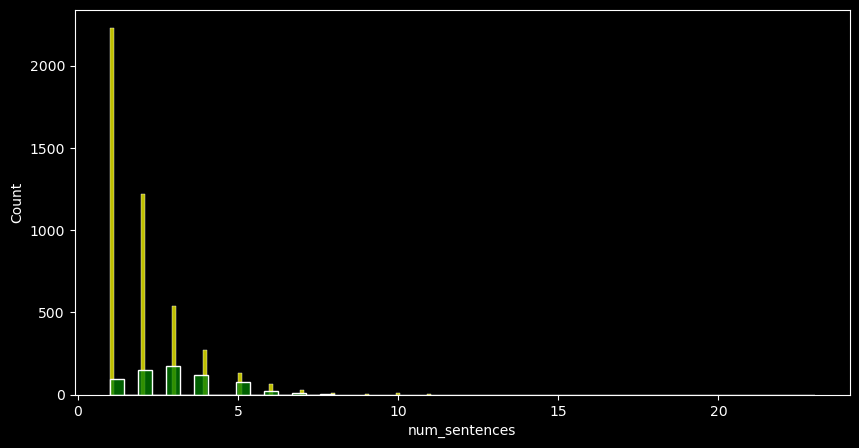

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(spam[spam['target'] == 0]['num_sentences'],color='yellow')
sns.histplot(spam[spam['target'] == 1]['num_sentences'],color='green')

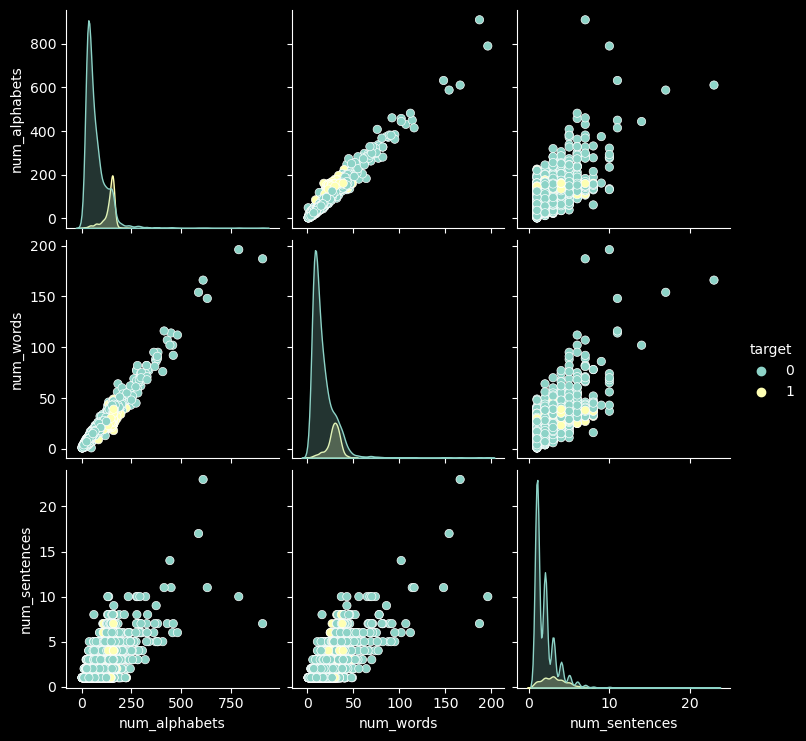

In [29]:
sns.pairplot(spam,hue='target')

C:\Users\maran\AppData\Local\Temp\ipykernel_13776\1656657617.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam.corr(),annot=True,cmap='viridis')


<Axes: >

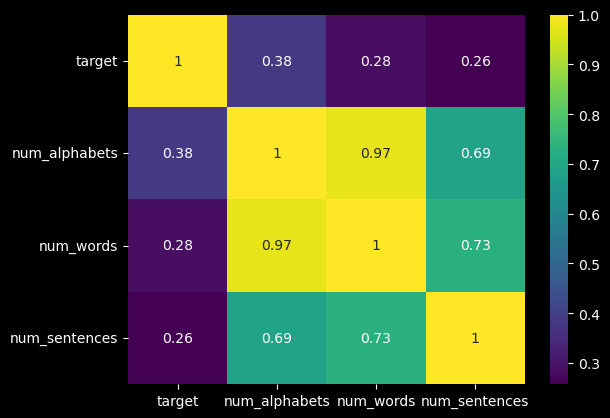

In [30]:
sns.heatmap(spam.corr(),annot=True,cmap='viridis')


# Data Preprocessing

In [31]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'bottom', 'my', 'seem', 'along', 'anyhow', 'give', 'nobody', 'most', 'mine', "'s", 'because', 'this', 'also', 'alone', 'call', 'did', 'eight', 'same', 'behind', 'as', 'often', 'done', 'last', 'otherwise', 'four', 'these', 'your', 'the', 'might', 'themselves', 'cannot', 'whatever', 'say', 'sometime', 'becomes', 'whole', 'namely', 'hers', 'their', 'has', 'off', 'n’t', 'until', 'from', "'m", 'something', 'were', 'i', 'is', 'hereafter', 'somewhere', 'very', '‘ve', 'will', 'amongst', 'no', 'with', 'if', 'beyond', 'above', 'side', 'he', 'wherever', 'meanwhile', 'further', 'hundred', 'somehow', 'least', 'him', 'although', 'his', 'could', 'throughout', 'not', 'go', 'onto', 'been', 'some', 'ten', '’re', 'seems', 'per', 'me', 'quite', 'everyone', 'therein', 'was', 'whereas', 'almost', 'such', 'besides', 'three', 'nor', 'whence', 'yourself', 'her', 'already', 'using', 'other', 'thence', 'towards', 'yours', 'front', 'a', 'formerly', 'perhaps', 'twenty', 'who', 'herself', 'own', 'thus', 'of', 'who

In [32]:
def transform(text):
    text = text.lower()
    doc = nlp(text)
    tokens = [token.text for token in doc if token.is_alpha]
    tokens = [token for token in tokens if token not in STOP_WORDS and token not in string.punctuation]
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    return " ".join(lemmatized_tokens)
            
        

In [33]:
transform('Hi how are you Kumar?')

'hi kumar'

In [34]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem('caring')

'care'

In [35]:
spam['transformed_text']=spam['text'].apply(transform)

In [36]:
spam.head()

,target,text,num_alphabets,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life


In [37]:
wc=WordCloud(width=1500,height=1500,background_color='white')

In [38]:
spam_wc = wc.generate(spam[spam['target'] == 1]['transformed_text'].str.cat(sep=" "))

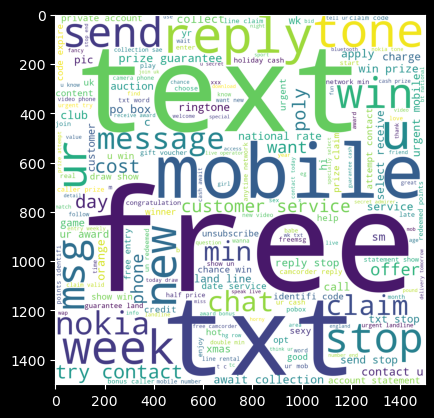

In [39]:
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(spam[spam['target'] == 0]['transformed_text'].str.cat(sep=" "))

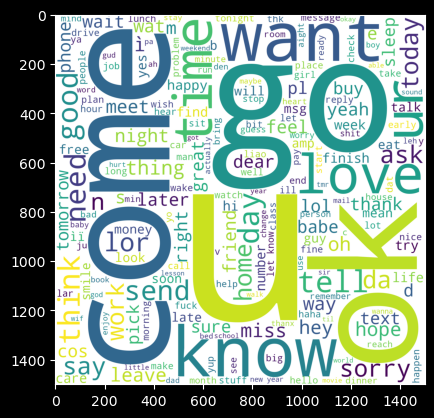

In [41]:
plt.imshow(ham_wc)

In [42]:
spam_corpus = []
for msg in spam[spam['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

7584

# Model Building


In [76]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(spam['transformed_text']).toarray()
print(X.shape)

(5169, 6092)


In [77]:
y=spam['target'].values

In [78]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2)

In [80]:
gaussian_nb=GaussianNB()
multinomial_nb=MultinomialNB()
bernoulli_nb=BernoulliNB()

In [81]:
gaussian_nb.fit(X_train,y_train)
y_pred1=gaussian_nb.predict(X_test)
multinomial_nb.fit(X_train,y_train)
y_pred2=multinomial_nb.predict(X_test)
bernoulli_nb.fit(X_train,y_train)
y_pred3=bernoulli_nb.predict(X_test)


In [82]:
def draw_cm(actual_value,pred_value):
  cm=confusion_matrix(actual_value,pred_value)
  group_names = ["FN","FP","TN","TP"]
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt='', cmap='viridis')

In [90]:
def model_evaluator(actual_value,pred_value):
  
  model_scores={
    'accuracy-':round(accuracy_score(actual_value,pred_value),4),
    'f1 score-':round(f1_score(actual_value,pred_value),4),
    'precision-':round(precision_score(actual_value,pred_value),4),
    'recall-':round(recall_score(actual_value,pred_value),4)
    
  }
  
  return model_scores

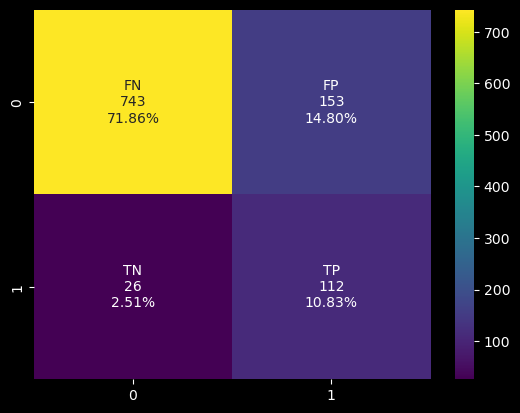

In [83]:
draw_cm(y_test,y_pred1)

In [91]:
print(model_evaluator(y_test,y_pred1))

{'accuracy-': 0.8269, 'f1 score-': 0.5558, 'precision-': 0.4226, 'recall-': 0.8116}


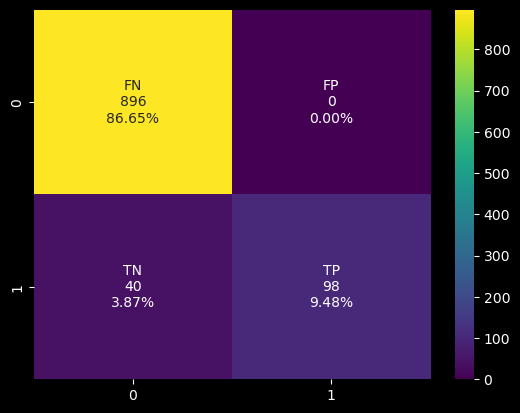

In [85]:
draw_cm(y_test,y_pred2)

In [105]:
print(model_evaluator(y_test,y_pred2))

0.9613


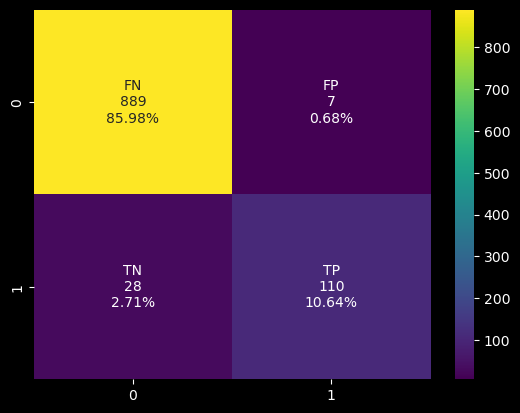

In [87]:
draw_cm(y_test,y_pred3)

In [93]:
print(model_evaluator(y_test,y_pred3))

{'accuracy-': 0.9662, 'f1 score-': 0.8627, 'precision-': 0.9402, 'recall-': 0.7971}


In [101]:
log=LogisticRegression(solver='liblinear',penalty='l1')
knn=KNeighborsClassifier(n_neighbors=5)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=10)
rf=RandomForestClassifier(n_estimators=50)
gbc=GradientBoostingClassifier(n_estimators=50)
etc=ExtraTreesClassifier(n_estimators=50)
abc=AdaBoostClassifier(n_estimators=50)

In [107]:
classifiers={
    'log_reg':log,
    'KNN':knn,
    'NB':mnb,
    'DT':dtc,
    'RF':rf,
    'GBC':gbc,
    'ET':etc,
    'AB':abc
}

In [108]:
def model_trainer_and_evaluator(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    return model_evaluator(y_test,y_pred)

In [109]:
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

for model_name,classifier in classifiers.items():
    print(f"Model:{model_name}")
    metrics=model_trainer_and_evaluator(classifier,X_train,y_train,X_test,y_test)
    print(f"Metrics:{metrics}")
    accuracy_scores.append(metrics['accuracy-'])
    f1_scores.append(metrics['f1 score-'])
    precision_scores.append(metrics['precision-'])
    recall_scores.append(metrics['recall-'])

Model:log_reg
Metrics:{'accuracy-': 0.9507, 'f1 score-': 0.7866, 'precision-': 0.9307, 'recall-': 0.6812}
Model:KNN
Metrics:{'accuracy-': 0.9101, 'f1 score-': 0.4918, 'precision-': 1.0, 'recall-': 0.3261}
Model:NB
Metrics:{'accuracy-': 0.9613, 'f1 score-': 0.8305, 'precision-': 1.0, 'recall-': 0.7101}
Model:DT
Metrics:{'accuracy-': 0.9381, 'f1 score-': 0.7265, 'precision-': 0.8854, 'recall-': 0.6159}
Model:RF
Metrics:{'accuracy-': 0.9681, 'f1 score-': 0.8675, 'precision-': 0.973, 'recall-': 0.7826}
Model:GBC
Metrics:{'accuracy-': 0.9458, 'f1 score-': 0.7522, 'precision-': 0.9659, 'recall-': 0.6159}
Model:ET
Metrics:{'accuracy-': 0.9778, 'f1 score-': 0.9098, 'precision-': 0.9915, 'recall-': 0.8406}
Model:AB
Metrics:{'accuracy-': 0.9623, 'f1 score-': 0.8446, 'precision-': 0.9381, 'recall-': 0.7681}


In [111]:

performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [112]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.9101,1.0000
2,NB,0.9613,1.0000
6,ET,0.9778,0.9915
4,RF,0.9681,0.9730
5,GBC,0.9458,0.9659
7,AB,0.9623,0.9381
0,log_reg,0.9507,0.9307
3,DT,0.9381,0.8854


In [113]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [114]:
performance_df1

,Algorithm,variable,value
0,KNN,Accuracy,0.9101
1,NB,Accuracy,0.9613
2,ET,Accuracy,0.9778
3,RF,Accuracy,0.9681
4,GBC,Accuracy,0.9458
5,AB,Accuracy,0.9623
6,log_reg,Accuracy,0.9507
7,DT,Accuracy,0.9381
8,KNN,Precision,1.0000
9,NB,Precision,1.0000


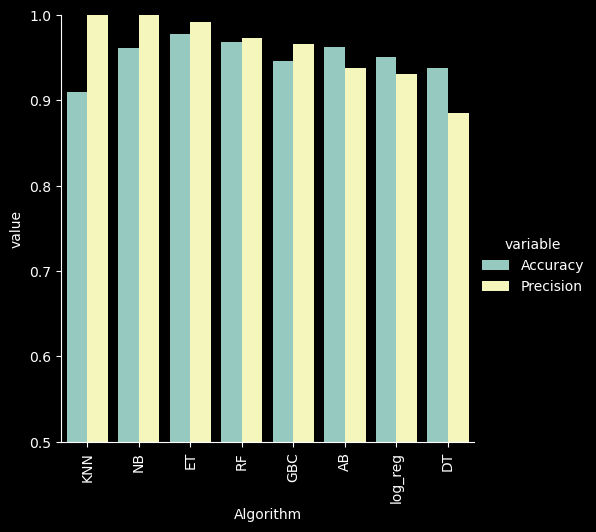

In [117]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [123]:

performance_df2 = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [124]:
performance_df2

,Algorithm,Accuracy,Precision
6,ET,0.9778,0.9915
4,RF,0.9681,0.9730
7,AB,0.9623,0.9381
2,NB,0.9613,1.0000
0,log_reg,0.9507,0.9307
5,GBC,0.9458,0.9659
3,DT,0.9381,0.8854
1,KNN,0.9101,1.0000


In [127]:
etc=ExtraTreesClassifier(n_estimators=50)
rfc=RandomForestClassifier(n_estimators=50)
ab=AdaBoostClassifier(n_estimators=50)

vote=VotingClassifier(estimators=[('extra_tree',etc),('random_forest',rfc),('ada_boost',abc)],voting='soft')
vote.fit(X_train,y_train)


VotingClassifier(estimators=[('extra_tree',
                              ExtraTreesClassifier(n_estimators=50)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=50)),
                             ('ada_boost', AdaBoostClassifier())],
                 voting='soft')

In [128]:
y_pred=vote.predict(X_test)
model_evaluator(y_test,y_pred)


{'accuracy-': 0.9739,
 'f1 score-': 0.8933,
 'precision-': 0.9826,
 'recall-': 0.8188}

In [130]:
extra=ExtraTreesClassifier(n_estimators=50)
extra.fit(X_train,y_train)
y_pred=extra.predict(X_test)
model_evaluator(y_test,y_pred)

{'accuracy-': 0.971,
 'f1 score-': 0.881,
 'precision-': 0.9737,
 'recall-': 0.8043}

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))